In [7]:
import pandas as pd
df = pd.read_csv("../data/anime.csv")



genre
Josei            7.443077
Thriller         7.382326
Mystery          7.232412
Police           7.122051
Shounen          7.057553
Psychological    7.010398
Military         7.004904
Supernatural     7.000380
Romance          6.999054
Shoujo Ai        6.978148
Name: rating, dtype: float64


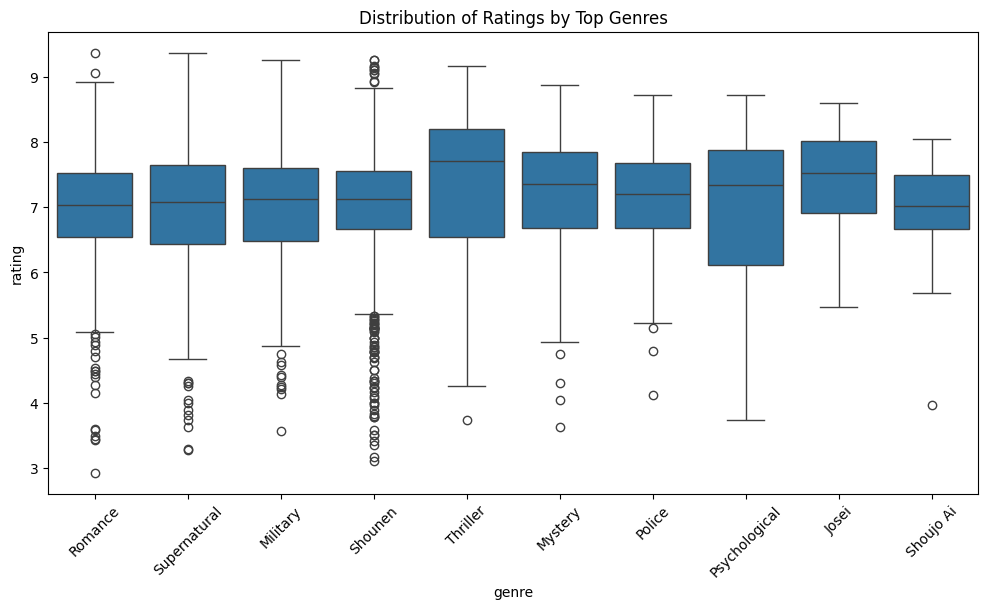

In [8]:

genre_df = df[['genre', 'rating']].dropna()


genre_exploded = genre_df.assign(genre=genre_df['genre'].str.split(', ')).explode('genre')


genre_ratings = genre_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False)
print(genre_ratings.head(10))


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_genres = genre_exploded[genre_exploded['genre'].isin(genre_ratings.head(10).index)]
sns.boxplot(x='genre', y='rating', data=top_genres)
plt.title("Distribution of Ratings by Top Genres")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import f_oneway

selected_genres = genre_ratings.head(5).index
samples = [genre_exploded[genre_exploded['genre'] == g]['rating'].dropna() for g in selected_genres]

f_stat, p_value = f_oneway(*samples)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.4f}")



F-statistic: 8.528, P-value: 0.0000


In [5]:
from pathlib import Path

# define your project directories
PROJECT_DIR   = Path().resolve().parent
DATA_DIR      = PROJECT_DIR / 'data'
PROCESSED_DIR = DATA_DIR    / 'processed'
FIGURES_DIR   = PROJECT_DIR / 'reports' / 'figures'

# create folders if they don’t exist
for d in (PROCESSED_DIR, FIGURES_DIR):
    d.mkdir(parents=True, exist_ok=True)


In [7]:
import pandas as pd
df = pd.read_csv(DATA_DIR / 'anime.csv')
df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
#Genre Summary Statistics
genre_summary = (
    genre_df
      .groupby('genre')['rating']
      .agg(
         count       = 'count',
         mean_rating = 'mean',
         max_rating  = 'max',
         min_rating  = 'min'
      )
      .sort_values('mean_rating', ascending=False)
      .reset_index()
)

#top 10
genre_summary.head(10)



,genre,count,mean_rating,max_rating,min_rating
0,Josei,52,7.443077,8.59,5.47
1,Thriller,86,7.382326,9.17,3.74
2,Mystery,485,7.232412,8.88,3.63
3,Police,195,7.122051,8.72,4.12
4,Shounen,1684,7.057553,9.26,3.11
5,Psychological,226,7.010398,8.72,3.73
6,Military,416,7.004904,9.26,3.57
7,Supernatural,1001,7.000380,9.37,3.28
8,Romance,1437,6.999054,9.37,2.93
9,Shoujo Ai,54,6.978148,8.04,3.96


Pearson Correlation: 0.388, P-value: 0.0000


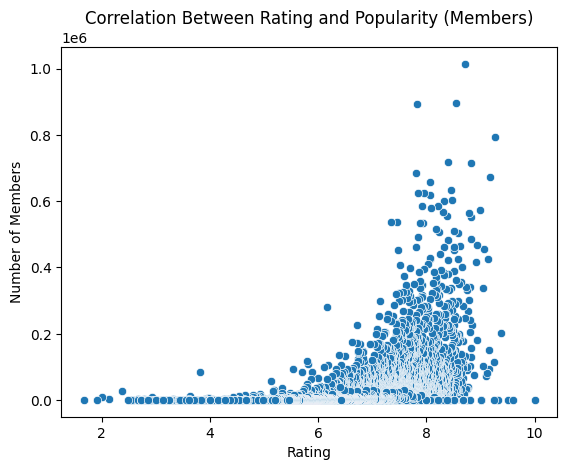

In [ ]:

corr_df = df[['rating', 'members']].dropna()

from scipy.stats import pearsonr

corr, p_value = pearsonr(corr_df['rating'], corr_df['members'])
print(f"Pearson Correlation: {corr:.3f}, P-value: {p_value:.4f}")
sns.scatterplot(data=corr_df, x='rating', y='members')
plt.title("Correlation Between Rating and Popularity (Members)")
plt.xlabel("Rating")
plt.ylabel("Number of Members")
plt.show()

